In [9]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1298,ham,Your daily text from me ÛÒ a favour this time,NaN,NaN,NaN
520,ham,But that's on ebay it might be less elsewhere.,NaN,NaN,NaN
1358,ham,If i start sending blackberry torch to nigeria...,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN
164,spam,BangBabes Ur order is on the way. U SHOULD rec...,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [24]:
df.sample(5)

,v1,v2
557,ham,I know that my friend already told that.
1758,ham,Sorry i'm not free...
5453,ham,Except theres a chick with huge boobs.
1180,ham,I'm in chennai velachery:)
70,ham,Wah lucky man... Then can save money... Hee...


In [25]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [26]:
from sklearn.preprocessing  import LabelEncoder
encoder=LabelEncoder()

In [27]:
df['Target']=encoder.fit_transform(df['Target'])

In [28]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# checking missing values are there or not
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [30]:
# checking the duplicate values
df.duplicated().sum()

403

In [31]:
# removing duplicates in order to clean the data
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [32]:
df= df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

## 2. EDA

In [34]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

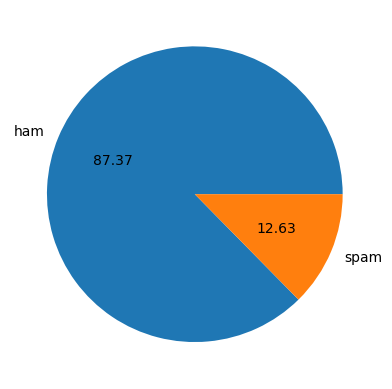

In [35]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [36]:
! pip install nltk

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['Num_characters']= df['Text'].apply(len)

In [40]:
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# finding the number of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [42]:
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
df.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['Num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [47]:
# ham
df[df['Target']==0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [48]:
# spam
df[df['Target']==1][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [49]:
import seaborn as sns

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

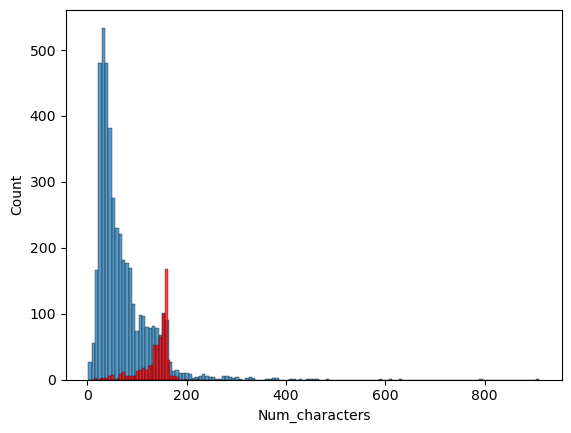

In [50]:
sns.histplot(df[df['Target']==0]['Num_characters'])
sns.histplot(df[df['Target']==1]['Num_characters'],color='red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

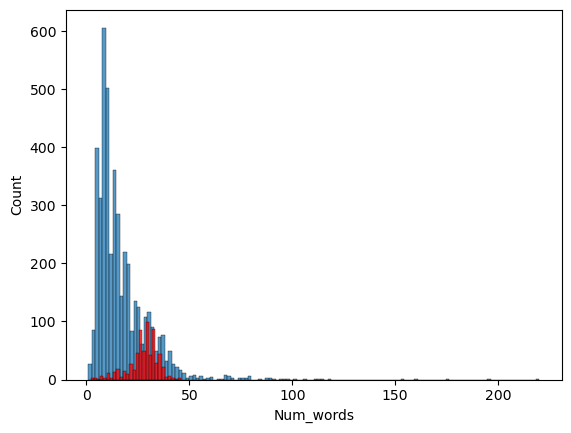

In [51]:
sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'],color='red')

<AxesSubplot:xlabel='Num_sentences', ylabel='Count'>

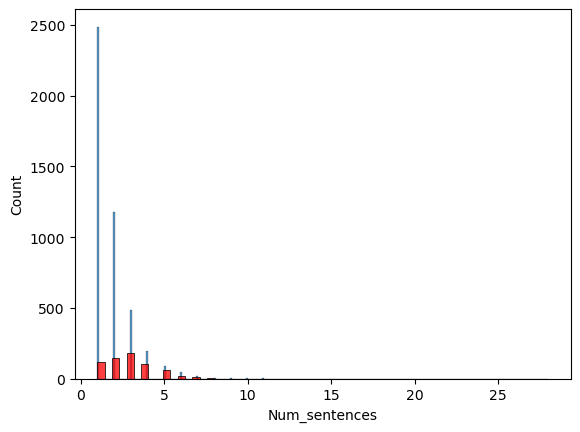

In [52]:
sns.histplot(df[df['Target']==0]['Num_sentences'])
sns.histplot(df[df['Target']==1]['Num_sentences'],color='red')

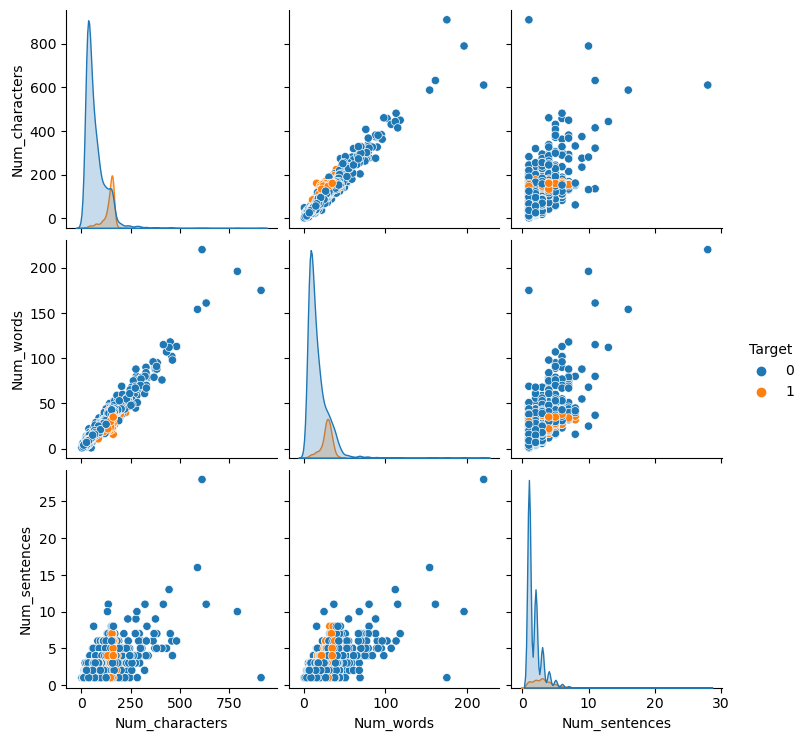

In [53]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

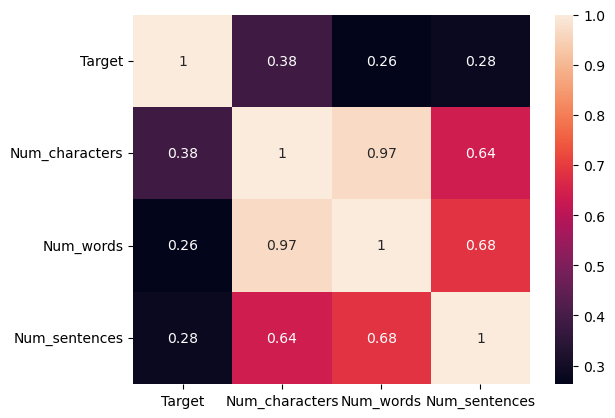

In [54]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [55]:
def transform_text(Text):
    Text=Text.lower()
    return Text

In [56]:
transform_text('NIsHant KapoOR')

'nishant kapoor'

In [57]:
def transform_text(Text):
    Text=Text.lower()
    Text=nltk.word_tokenize(Text)
    return Text

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
transform_text('NIsHant KapoOR')

['nishant', 'kapoor']

In [61]:
def transform_text(Text):
    Text=Text.lower()
    Text=nltk.word_tokenize(Text)
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
            
            
    Text=y[:]
    y.clear()
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text=y[:]
    y.clear()
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [70]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Stunning')

'stun'

In [71]:
transform_text('How are you NIsHant KapoOR 10 3%% machine')

'nishant kapoor 10 3 machin'

In [72]:
df['Transformed_text']=df['Text'].apply(transform_text)

In [73]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

9939

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


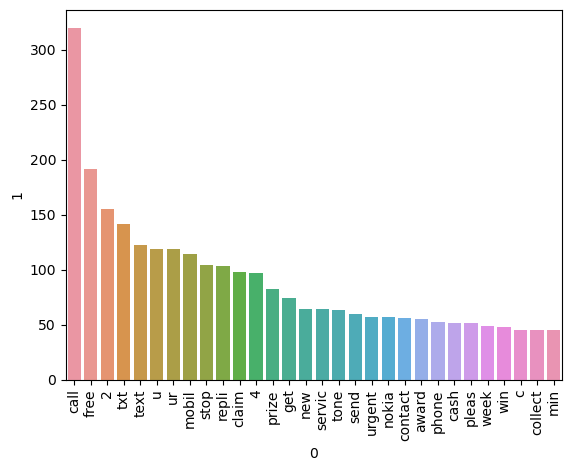

In [76]:
# counter creates a dictionary for each word that appears
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [78]:
len(ham_corpus)

35394

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


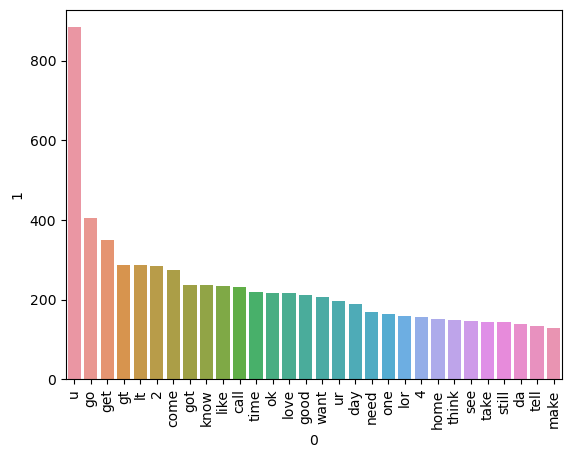

In [79]:
# counter creates a dictionary for each word that appears
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [129]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [130]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [170]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [171]:
X.shape

(5169, 3000)

In [172]:
y=df['Target'].values

In [173]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [177]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [140]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [141]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [142]:
# tfidf -> MNB

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [145]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
}

In [146]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [147]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9661508704061895, 0.9256198347107438)

In [148]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy= ",current_accuracy)
    print("Precision= ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy=  0.9661508704061895
Precision=  0.9256198347107438


C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy=  0.9052224371373307
Precision=  0.9761904761904762
For  NB
Accuracy=  0.9787234042553191
Precision=  0.9461538461538461
For  DT
Accuracy=  0.9274661508704062
Precision=  0.8118811881188119
For  LR
Accuracy=  0.9671179883945842
Precision=  0.9642857142857143
For  RF
Accuracy=  0.9748549323017408
Precision=  0.9827586206896551
For  AdaBoost
Accuracy=  0.960348162475822
Precision=  0.9292035398230089
For  BgC
Accuracy=  0.9574468085106383
Precision=  0.8671875
For  ETC
Accuracy=  0.9748549323017408
Precision=  0.9745762711864406
For  GBDT
Accuracy=  0.9477756286266924
Precision=  0.92


In [149]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [150]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.974855,0.982759
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.927466,0.811881


In [151]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [152]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.974855
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,AdaBoost,Accuracy,0.960348
6,SVC,Accuracy,0.966151
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.927466


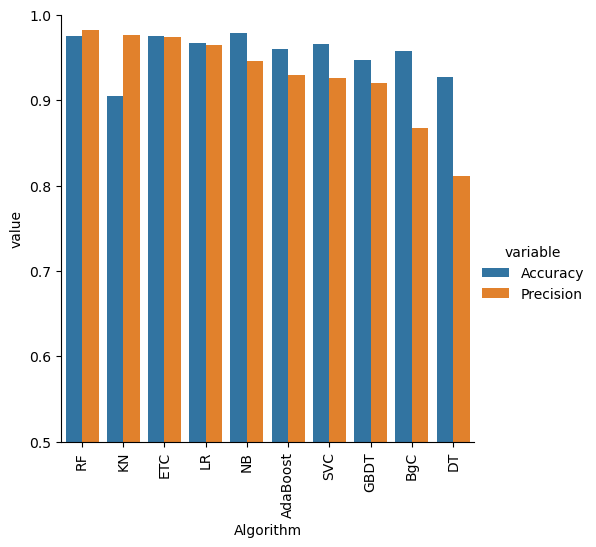

In [153]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [154]:
# improving the model
# 1. Change the max_features parameters of Tfidf(It means if we keep the features equal to 1000 then only those 1000 words which
# are repeating for max time would be shown )

In [179]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [180]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [181]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [182]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [183]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [158]:
new_df_scaled.merge(temp_def,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,SVC,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
7,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
8,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [184]:
# Voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [185]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [186]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [187]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9606299212598425


In [188]:
# Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [189]:
from sklearn.ensemble import StackingClassifier

In [190]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [191]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [192]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))